Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

import thinkpython

# Classes e Objetos

Neste ponto, definimos classes e criamos objetos que representam a hora do dia e o dia do ano.
E definimos métodos que criam, modificam e realizam cálculos com esses objetos.

Neste capítulo, continuaremos nosso tour pela programação orientada a objetos (POO) definindo classes que representam objetos geométricos, incluindo pontos, linhas, retângulos e círculos.
Escreveremos métodos que criam e modificam esses objetos e usaremos o módulo `jupyturtle` para desenhá-los.

Usarei essas classes para demonstrar tópicos de POO, incluindo identidade e equivalência de objetos, cópia superficial e profunda e polimorfismo.

## Criando um ponto

Em computação gráfica, um local na tela é frequentemente representado usando um par de coordenadas em um plano `x`-`y`.
Por convenção, o ponto `(0, 0)` geralmente representa o canto superior esquerdo da tela, e `(x, y)` representa o ponto `x` unidades para a direita e `y` unidades para baixo da origem.
Comparado ao sistema de coordenadas cartesianas que você pode ter visto em uma aula de matemática, o eixo `y` está de cabeça para baixo.

Há várias maneiras de representar um ponto em Python:

- Podemos armazenar as coordenadas separadamente em duas variáveis, `x` e `y`.

- Podemos armazenar as coordenadas como elementos em uma lista ou tupla.

- Podemos criar um novo tipo para representar pontos como objetos.

Na programação orientada a objetos, seria mais idiomático criar um novo tipo.
Para fazer isso, começaremos com uma definição de classe para `Point`:

In [ ]:
class Point:
    """Representa um ponto no espaço 2-D."""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f'Point({self.x}, {self.y})'

O método `__init__` recebe as coordenadas como parâmetros e as atribui aos atributos `x` e `y`.
O método `__str__` devolve uma *string* representando o `Point`.

Agora podemos instanciar e exibir um objeto `Point` como este:

In [ ]:
start = Point(0, 0)
print(start)

Point(0, 0)


O diagrama a seguir mostra o estado do novo objeto:

In [ ]:
from diagram import make_frame, make_binding

d1 = vars(start)
frame = make_frame(d1, name='Point', dy=-0.25, offsetx=0.18)
binding = make_binding('start', frame)

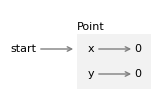

In [ ]:
from diagram import diagram, adjust

width, height, x, y = [1.41, 0.89, 0.26, 0.5]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

Como de costume, um tipo definido pelo programador é representado por uma caixa com o nome do tipo do lado de fora e os atributos dentro.

Em geral, tipos definidos pelo programador são mutáveis, então podemos escrever um método como `translate` que recebe dois números, `dx` e `dy`, e os adiciona aos atributos `x` e `y`:

In [ ]:
%%add_method_to Point

    def translate(self, dx, dy):
        self.x += dx
        self.y += dy

Esta função traduz o `Point` de um local no plano para outro.
Se não quisermos modificar um `Point` existente, podemos usar `copy` para copiar o objeto original e então modificar a cópia:

In [ ]:
from copy import copy

end1 = copy(start)
end1.translate(300, 0)
print(end1)

Point(300, 0)


Podemos encapsular essas etapas em outro método chamado `translated`:

In [ ]:
%%add_method_to Point

    def translated(self, dx=0, dy=0):
        point = copy(self)
        point.translate(dx, dy)
        return point

Da mesma forma que a função interna `sort` modifica uma lista, e a função `sorted` cria uma nova lista, agora temos um método `translate` que modifica um `Point` e um método `translated` que cria um novo.

Aqui está um exemplo:

In [ ]:
end2 = start.translated(0, 150)
print(end2)

Point(0, 150)


Na próxima seção, usaremos esses pontos para definir e desenhar uma linha.

## Criando uma linha

Agora vamos definir uma classe que representa o segmento de linha entre dois pontos.
Como de costume, começaremos com um método `__init__` e um método `__str__`:

In [ ]:
class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __str__(self):
        return f'Line({self.p1}, {self.p2})'

Com esses dois métodos, podemos instanciar e exibir um objeto `Line` que usaremos para representar o eixo `x`:

In [ ]:
line1 = Line(start, end1)
print(line1)

Line(Point(0, 0), Point(300, 0))


Quando chamamos `print` e passamos `line` como parâmetro, `print` invoca `__str__` em `line`.
O método `__str__` usa uma *f-string* para criar uma *string* representando `line`.

A *f-string* contém duas expressões entre chaves, `self.p1` e `self.p2`.
Quando essas expressões são avaliadas, os resultados são objetos `Point`.
Então, quando são convertidos em *strings*, o método `__str__` da classe `Point` é invocado.

É por isso que, quando exibimos uma `Line`, o resultado contém as *strings* representando os objetos `Point`.

O diagrama de objetos a seguir mostra o estado deste objeto `Line`:

In [ ]:
from diagram import Binding, Value, Frame

d1 = vars(line1.p1)
frame1 = make_frame(d1, name='Point', dy=-0.25, offsetx=0.17)

d2 = vars(line1.p2)
frame2 = make_frame(d2, name='Point', dy=-0.25, offsetx=0.17)

binding1 = Binding(Value('start'), frame1, dx=0.4)
binding2 = Binding(Value('end'), frame2, dx=0.4)
frame3 = Frame([binding1, binding2], name='Line', dy=-0.9, offsetx=0.4, offsety=-0.25)

binding = make_binding('line1', frame3)

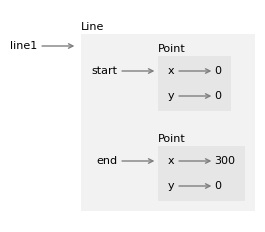

In [ ]:
width, height, x, y = [2.45, 2.12, 0.27, 1.76]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

Representações com *strings* e diagramas de objetos são úteis para depuração, mas o objetivo deste exemplo é gerar gráficos, não texto!
Então, usaremos o módulo `jupyturtle` para desenhar linhas na tela.

Como fizemos no [Capítulo 4](https://colab.research.google.com/github/rodrigocarlson/PensePython3ed/blob/main/capitulos/chap04.ipynb), usaremos `make_turtle` para criar um objeto `Turtle` e uma pequena tela onde ele pode desenhar.
Para desenhar linhas, usaremos duas novas funções do módulo `jupyturtle`:

* `jumpto`, que recebe duas coordenadas e move a `Turtle` para o local fornecido sem desenhar uma linha, e

* `moveto`, que move a `Turtle` de seu local atual para o local fornecido e desenha um segmento de linha entre elas.

Veja como as importamos:

In [ ]:
from jupyturtle import make_turtle, jumpto, moveto

E aqui está um método que desenha uma `Linha`:

In [ ]:
%%add_method_to Line

    def draw(self):
        jumpto(self.p1.x, self.p1.y)
        moveto(self.p2.x, self.p2.y)

Para mostrar como ele é usado, criarei uma segunda linha que representa o eixo `y`:

In [ ]:
line2 = Line(start, end2)
print(line2)

Line(Point(0, 0), Point(0, 150))


E então desenhar os eixos:

In [ ]:
make_turtle()
line1.draw()
line2.draw()

Conforme definimos e desenhamos mais objetos, usaremos essas linhas novamente.
Mas primeiro vamos falar sobre equivalência e identidade de objetos.

## Equivalência e identidade

Suponha que criamos dois pontos com as mesmas coordenadas:

In [ ]:
p1 = Point(200, 100)
p2 = Point(200, 100)

Se usarmos o operador `==` para compará-los, obteremos o comportamento padrão para tipos definidos pelo programador -- o resultado será `True` somente se eles forem o mesmo objeto, o que não é o caso:

In [ ]:
p1 == p2

False

Se quisermos mudar esse comportamento, podemos fornecer um método especial chamado `__eq__` que define o que significa dois objetos `Point` serem iguais:

In [ ]:
%%add_method_to Point

def __eq__(self, other):
    return (self.x == other.x) and (self.y == other.y)

Esta definição considera dois `Points` iguais se seus atributos forem iguais.
Agora, quando usamos o operador `==`, ele invoca o método `__eq__`, que indica que `p1` e `p2` são considerados iguais:

In [ ]:
p1 == p2

True

Mas o operador `is` ainda indica que eles são objetos diferentes:

In [ ]:
p1 is p2

False

Não é possível sobrescrever o operador `is` -- ele sempre verifica se os objetos são idênticos.
Mas para tipos definidos pelo programador, você pode substituir o operador `==` para que ele verifique se os objetos são equivalentes.
E você pode definir o que significa ser equivalente.

## Criando um retângulo

Agora vamos definir uma classe que representa e desenha retângulos.
Para manter as coisas simples, vamos assumir que os retângulos são verticais ou horizontais, não em um ângulo.
Quais atributos você acha que devemos usar para especificar a localização e o tamanho de um retângulo?

Há pelo menos duas possibilidades:

- Você pode especificar a largura e a altura do retângulo e a localização de um canto.

- Você pode especificar dois cantos opostos.

Neste ponto, é difícil dizer se uma é melhor que a outra, então vamos implementar a primeira.
Aqui está a definição da classe:

In [ ]:
class Rectangle:
    """Representa um retângulo.

    atributos: width, height, corner.
    """
    def __init__(self, width, height, corner):
        self.width = width
        self.height = height
        self.corner = corner

    def __str__(self):
        return f'Rectangle({self.width}, {self.height}, {self.corner})'

Como de costume, o método `__init__` atribui os parâmetros aos atributos e o `__str__` retorna uma *string* representando o objeto.
Agora podemos instanciar um objeto `Rectangle`, usando um `Point` como a localização do canto superior esquerdo:

In [ ]:
corner = Point(30, 20)
box1 = Rectangle(100, 50, corner)
print(box1)

Rectangle(100, 50, Point(30, 20))


O diagrama a seguir mostra o estado deste objeto:

In [ ]:
from diagram import Binding, Value

def make_rectangle_binding(name, box, **options):
    d1 = vars(box.corner)
    frame_corner = make_frame(d1, name='Point', dy=-0.25, offsetx=0.07)

    d2 = dict(width=box.width, height=box.height)
    frame = make_frame(d2, name='Rectangle', dy=-0.25, offsetx=0.45)
    binding = Binding(Value('corner'), frame1, dx=0.92, draw_value=False, **options)
    frame.bindings.append(binding)

    binding = Binding(Value(name), frame)
    return binding, frame_corner

binding_box1, frame_corner1 = make_rectangle_binding('box1', box1)

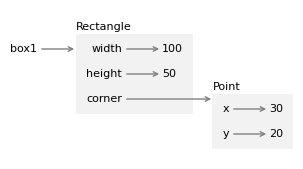

In [ ]:
from diagram import Bbox

width, height, x, y = [2.83, 1.49, 0.27, 1.1]
ax = diagram(width, height)
bbox1 = binding_box1.draw(ax, x, y)
bbox2 = frame_corner1.draw(ax, x+1.85, y-0.6)
bbox = Bbox.union([bbox1, bbox2])
#adjust(x, y, bbox)

Para desenhar um retângulo, usaremos o seguinte método para criar quatro objetos `Point` para representar os cantos:

In [ ]:
%%add_method_to Rectangle

    def make_points(self):
        p1 = self.corner
        p2 = p1.translated(self.width, 0)
        p3 = p2.translated(0, self.height)
        p4 = p3.translated(-self.width, 0)
        return p1, p2, p3, p4

Então faremos quatro objetos `Line` para representar os lados:

In [ ]:
%%add_method_to Rectangle

    def make_lines(self):
        p1, p2, p3, p4 = self.make_points()
        return Line(p1, p2), Line(p2, p3), Line(p3, p4), Line(p4, p1)

Depois desenharemos os lados:

In [ ]:
%%add_method_to Rectangle

    def draw(self):
        lines = self.make_lines()
        for line in lines:
            line.draw()

Aqui está um exemplo:

In [ ]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()

A figura inclui duas linhas para representar os eixos.

## Alterando retângulos

Agora vamos considerar dois métodos que modificam retângulos, `grow` e `translate`.
Veremos que `grow` funciona como esperado, mas `translate` tem um bug sutil.
Veja se consegue descobrir antes que eu explique.

`grow` recebe dois números, `dwidth` e `dheight`, e os adiciona aos atributos `width` e `height` do retângulo:

In [ ]:
%%add_method_to Rectangle

    def grow(self, dwidth, dheight):
        self.width += dwidth
        self.height += dheight

Aqui está um exemplo que demonstra o efeito ao fazer uma cópia de `box1` e invocar `grow` na cópia:

In [ ]:
box2 = copy(box1)
box2.grow(60, 40)
print(box2)

Rectangle(160, 90, Point(30, 20))


Se desenharmos `box1` e `box2`, podemos confirmar que `grow` funciona como esperado:

In [ ]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()
box2.draw()

Agora vamos ver `translate`.
Ele recebe dois números, `dx` e `dy`, e move o retângulo nas direções `x` e `y` pelas distâncias dadas:

In [ ]:
%%add_method_to Rectangle

    def translate(self, dx, dy):
        self.corner.translate(dx, dy)

Para demonstrar o efeito, vamos transladar `box2` para a direita e para baixo:

In [ ]:
box2.translate(30, 20)
print(box2)

Rectangle(160, 90, Point(60, 40))


Agora vamos ver o que acontece se desenharmos `box1` e `box2` novamente:

In [ ]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()
box2.draw()

Parece que ambos os retângulos se moveram, o que não é o que pretendíamos!
A próxima seção explica o que deu errado.

## Cópia profunda

Quando usamos `copy` para duplicar `box1`, ele copia o objeto `Rectangle`, mas não o objeto `Point` que ele contém.
Então `box1` e `box2` são objetos diferentes, como pretendido:

In [ ]:
box1 is box2

False

Mas seus atributos `corner` referem-se ao mesmo objeto:

In [ ]:
box1.corner is box2.corner

True

O diagrama a seguir mostra o estado desses objetos:

In [ ]:
from diagram import Stack
from copy import deepcopy

binding_box1, frame_corner1 = make_rectangle_binding('box1', box1)
binding_box2, frame_corner2 = make_rectangle_binding('box2', box2, dy=0.4)
binding_box2.value.bindings.reverse()

stack = Stack([binding_box1, binding_box2], dy=-1.3)

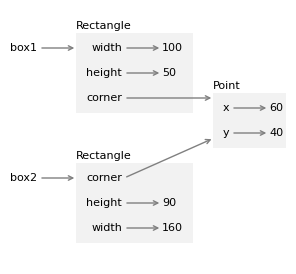

In [ ]:
from diagram import Bbox

width, height, x, y = [2.76, 2.54, 0.27, 2.16]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = frame_corner1.draw(ax, x+1.85, y-0.6)
bbox = Bbox.union([bbox1, bbox2])
# adjust(x, y, bbox)

O que `copy` faz é chamado de **cópia rasa** porque copia o objeto, mas não os objetos que ele contém.
Como resultado, alterar a `width` ou `height` de um `Rectangle` não afeta o outro, mas alterar os atributos do `Point` compartilhado afeta ambos!
Esse comportamento é confuso e propenso a erros.

Felizmente, o módulo `copy` possui outra função, chamada `deepcopy`, que copia não apenas o objeto, mas também os objetos aos quais ele se refere, e os objetos aos quais *eles* se referem, e assim por diante.
Essa operação é chamada de **cópia profunda**.

Para demonstrar, vamos começar com um novo `Rectangle` que contém um novo `Point`:

In [ ]:
corner = Point(20, 20)
box3 = Rectangle(100, 50, corner)
print(box3)

Rectangle(100, 50, Point(20, 20))


E faremos uma cópia profunda:

In [ ]:
from copy import deepcopy

box4 = deepcopy(box3)

Podemos confirmar que os dois objetos `Rectangle` se referem a diferentes objetos `Point`:

In [ ]:
box3.corner is box4.corner

False

Como `box3` e `box4` são objetos completamente separados, podemos modificar um sem afetar o outro.
Para demonstrar, moveremos `box3` e aumentaremos `box4`:

In [ ]:
box3.translate(50, 30)
box4.grow(100, 60)

E podemos confirmar que o efeito é o esperado:

In [ ]:
make_turtle()
line1.draw()
line2.draw()
box3.draw()
box4.draw()

## Polimorfismo

No exemplo anterior, invocamos o método `draw` em dois objetos `Line` e dois objetos `Rectangle`.
Podemos fazer a mesma coisa de forma mais concisa, criando uma lista de objetos:

In [ ]:
shapes = [line1, line2, box3, box4]

Os elementos desta lista são de tipos diferentes, mas todos eles fornecem um método `draw`, para que possamos percorrer a lista e invocar `draw` em cada um:

In [ ]:
make_turtle()

for shape in shapes:
    shape.draw()

Na primeira e segunda passada do laço, `shape` se refere a um objeto `Line`, então quando `draw` é invocado, o método que é executado é aquele definido na classe `Line`.

Na terceira e quarta passada do loop, `shape` se refere a um objeto `Rectangle`, então quando `draw` é invocado, o método que é executado é aquele definido na classe `Rectangle`.

Em certo sentido, cada objeto sabe como desenhar a si mesmo.
Esse recurso é chamado de **polimorfismo**.
A palavra vem de raízes gregas que significam "muitos formatos".
Na programação orientada a objetos, polimorfismo é a capacidade de diferentes tipos fornecerem os mesmos métodos, o que torna possível executar muitas computações -- como desenhar formas -- invocando o mesmo método em diferentes tipos de objetos.

Como um exercício no final deste capítulo, você definirá uma nova classe que representa um círculo e fornece um método `draw`.
Então você pode usar polimorfismo para desenhar linhas, retângulos e círculos.

## Depuração

Neste capítulo, encontramos um bug sutil que aconteceu porque criamos um `Point` que era compartilhado por dois objetos `Rectangle` e, então, modificamos o `Point`.
Em geral, há duas maneiras de evitar problemas como esse: você pode evitar compartilhar objetos ou pode evitar modificá-los.

Para evitar compartilhar objetos, você pode usar cópia profunda, como fizemos neste capítulo.

Para evitar modificar objetos, considere substituir funções impuras como `translate` por funções puras como `translated`.
Por exemplo, aqui está uma versão de `translated` que cria um novo `Point` e nunca modifica seus atributos:

In [ ]:
    def translated(self, dx=0, dy=0):
        x = self.x + dx
        y = self.y + dy
        return Point(x, y)

O Python fornece recursos que facilitam evitar a modificação de objetos.
Eles estão além do escopo deste livro, mas se você estiver curioso, pergunte a um assistente virtual: "Como faço para tornar um objeto Python imutável?" ("*How do I make a Python object immutable?*")

Criar um novo objeto leva mais tempo do que modificar um existente, mas a diferença raramente importa na prática.
Programas que evitam objetos compartilhados e funções impuras são frequentemente mais fáceis de desenvolver, testar e depurar -- e o melhor tipo de depuração é o tipo que você não precisa fazer.

## Glossário

**cópia rasa** (*shallow copy*)**:**
Uma operação de cópia que não copia objetos aninhados.

**cópia profunda** (*deep copy*)**:**
Uma operação de cópia que também copia objetos aninhados.

**polimorfismo** (*polymorphism*)**:**
A capacidade de um método ou operador de trabalhar com vários tipos de objetos.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-o antes de trabalhar nos
# exercícios.

%xmode Verbose

### Pergunte a um assistente virtual

Para todos os exercícios a seguir, considere pedir ajuda a um assistente virtual.
Se fizer isso, você vai querer incluir como parte do *prompt* as definições de classe para `Point`, `Line` e `Rectangle` -- caso contrário, o assistente virtual fará um palpite sobre seus atributos e funções, e o código que ele gerar não funcionará.

### Exercício

Escreva um método `__eq__` para a classe `Line` que devolve `True` se os objetos `Line` se referirem a objetos `Point` que sejam equivalentes, em qualquer ordem.

Você pode usar o seguinte esboço para começar.:

In [ ]:
%%add_method_to Line

def __eq__(self, other):
    return None

In [ ]:
# Solução

%%add_method_to Line

def __eq__(self, other):
    if (self.p1 == other.p1) and (self.p2 == other.p2):
        return True
    if (self.p1 == other.p2) and (self.p2 == other.p1):
        return True
    return False

Você pode usar esses exemplos para testar seu código:

In [ ]:
start1 = Point(0, 0)
start2 = Point(0, 0)
end = Point(200, 100)

Este exemplo deve ser `True` porque os objetos `Line` referem-se a objetos `Point` que são equivalentes, na mesma ordem:

In [ ]:
line_a = Line(start1, end)
line_b = Line(start2, end)
line_a == line_b    # deve ser True

True

Este exemplo deve ser `True` porque os objetos `Line` referem-se a objetos `Point` que são equivalentes, em ordem inversa:

In [ ]:
line_c = Line(end, start1)
line_a == line_c     # deve ser True

True

A equivalência deve ser sempre transitiva -- isto é, se `line_a` e `line_b` são equivalentes, e `line_a` e `line_c` são equivalentes, então `line_b` e `line_c` também devem ser equivalentes:

In [ ]:
line_b == line_c     # deve ser True

True

Este exemplo deve ser `False` porque os objetos `Line` referem-se a objetos `Point` que não são equivalentes:

In [ ]:
line_d = Line(start1, start2)
line_a == line_d    # deve ser False

False

### Exercício

Escreva um método `Line` chamado `midpoint` que calcula o ponto médio de um segmento de linha e devolve o resultado como um objeto `Point`:

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to Line

    def midpoint(self):
        return Point(0, 0)

In [ ]:
# Solução

%%add_method_to Line

    def midpoint(self):
        mid_x = (self.p1.x + self.p2.x) / 2
        mid_y = (self.p1.y + self.p2.y) / 2
        return Point(mid_x, mid_y)

Você pode usar os exemplos a seguir para testar seu código e desenhar o resultado:

In [ ]:
start = Point(0, 0)
end1 = Point(300, 0)
end2 = Point(0, 150)
line1 = Line(start, end1)
line2 = Line(start, end2)

In [ ]:
mid1 = line1.midpoint()
print(mid1)

Point(150.0, 0.0)


In [ ]:
mid2 = line2.midpoint()
print(mid2)

Point(0.0, 75.0)


In [ ]:
line3 = Line(mid1, mid2)

In [ ]:
make_turtle()

for shape in [line1, line2, line3]:
    shape.draw()

### Exercício

Escreva um método para `Rectangle` chamado `midpoint` que encontra o ponto no centro de um retângulo e devolve o resultado como um objeto `Point`:

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to Rectangle

    def midpoint(self):
        return Point(0, 0)

In [ ]:
# Solução

%%add_method_to Rectangle

    def midpoint(self):
        mid_x = self.corner.x + self.width / 2
        mid_y = self.corner.y + self.height / 2
        return Point(mid_x, mid_y)

Você pode usar o exemplo a seguir para testar seu código:

In [ ]:
corner = Point(30, 20)
rectangle = Rectangle(100, 80, corner)

In [ ]:
mid = rectangle.midpoint()
print(mid)

Point(80.0, 60.0)


In [ ]:
diagonal = Line(corner, mid)

In [ ]:
make_turtle()

for shape in [line1, line2, rectangle, diagonal]:
    shape.draw()

### Exercício

Escreva um método para `Rectangle` chamado `make_cross` que:

1. Usa `make_lines` para obter uma lista de objetos `Line` que representam os quatro lados do retângulo.

2. Calcula os pontos médios das quatro linhas.

3. Cria e devolve uma lista de dois objetos `Line` que representam linhas conectando pontos médios opostos, formando uma cruz no meio do retângulo.

Você pode usar este esboço para começar:

In [ ]:
%%add_method_to Rectangle

    def make_diagonals(self):
        return []

In [ ]:
# Solução

%%add_method_to Rectangle

    def make_cross(self):
        midpoints = []

        for line in self.make_lines():
            midpoints.append(line.midpoint())

        p1, p2, p3, p4 = midpoints
        return Line(p1, p3), Line(p2, p4)

Você pode usar o exemplo a seguir para testar seu código:

In [ ]:
corner = Point(30, 20)
rectangle = Rectangle(100, 80, corner)

In [ ]:
lines = rectangle.make_cross()

In [ ]:
make_turtle()

rectangle.draw()
for line in lines:
    line.draw()

### Exercício

Escreva uma definição de uma classe chamada `Circle` com atributos `center` e `radius`, onde `center` é um objeto Point e `radius` é um número.
Inclua métodos especiais `__init__` e `__str__`, e um método chamado `draw` que usa funções `jupyturtle` para desenhar o círculo.

Você pode usar a função a seguir, que é uma versão da função `circle` que escrevemos no Capítulo 4:

In [ ]:
from jupyturtle import make_turtle, forward, left, right
import math

def draw_circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    angle = 360 / n
    left(angle / 2)
    for i in range(n):
        forward(length)
        left(angle)

In [ ]:
# Solução

class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius

    def __str__(self):
        return f'Circle({self.center}, {self.radius})'

    def draw(self):
        start = self.center.translated(self.radius, 0)
        jumpto(start.x, start.y)
        left(90)
        draw_circle(self.radius)
        right(90)

Você pode usar o exemplo a seguir para testar seu código.
Começaremos com um quadrado `Rectangle` com largura e altura `100`:

In [ ]:
corner = Point(20, 20)
rectangle = Rectangle(100, 100, corner)

O código a seguir deve criar um `Círculo` que se encaixa dentro do quadrado:

In [ ]:
center = rectangle.midpoint()
radius = rectangle.height / 2

circle = Circle(center, radius)
print(circle)

Circle(Point(70.0, 70.0), 50.0)


Se tudo funcionou corretamente, o código a seguir deverá desenhar o círculo dentro do quadrado (tocando todos os quatro lados):

In [ ]:
make_turtle(delay=0.01)

rectangle.draw()
circle.draw()

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)